In [1]:
import random
import re
import jieba
from collections import Counter
import pandas as pd

## 读取表格文件内容，数据存入pandas的DataFrame中

In [2]:
filename = "sqlResult_1558435.csv"
content = pd.read_csv(filename, encoding= 'gb18030') # 'gb18030'


In [6]:
type(content.head(10))
print(content.head(10))

      id      author                    source  \
0  89617         NaN    快科技@http://www.kkj.cn/   
1  89616         NaN    快科技@http://www.kkj.cn/   
2  89615         NaN    快科技@http://www.kkj.cn/   
3  89614         NaN                       新华社   
4  89613  胡淑丽_MN7479                     深圳大件事   
5  89612          张怡                 中国证券报?中证网   
6  89611         NaN  威锋网@http://www.feng.com/   
7  89610      申玉彬 整理                 中国证券报?中证网   
8  89609  李杭_BJS4645                 荆楚网-楚天都市报   
9  89608          吴瞬                 中国证券报?中证网   

                                             content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   
5  　　受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...   
6  虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...   
7

## 提取文章

In [4]:
articles = content['content'].tolist()
articles[15]

'\u3000\u3000中国证券网讯（记者 费天元）沪深两市周五临近午盘出现快速跳水，沪指连续跌穿5日、10日及20日均线。截至午间收盘，上证指数报3124.23点，下跌0.74%；深证成指报10219.41点，下跌0.45%；创业板指报1780.20点，下跌1.01%。\r\n\u3000\u3000盘面上，部分地产板块权重股早盘异动，万科A上涨6.58%，保利地产上涨2.50%。石墨烯板块表现强势，碳元科技涨停，中科电气上涨8.39%。钛白粉板块同样涨幅靠前。\r\n\u3000\u3000跌幅方面，可燃冰概念领跌，恒泰艾普下跌8.90%，石化机械、潜能恒信跌逾6%。网络游戏板块深度回调，天沃科技下跌8.34%，天润数娱下跌6.49%。雄安概念重挫，中持股份、京汉股份等跌逾7%。粤港澳、上海国资板块同样跌幅靠前。\r\n'

## 课中老师把所有的字符去掉再去算概率，而我想尝试下有数字，有字符的情况能不能正常处理

分词

In [5]:
words = jieba.cut(articles[5])
wordsCount = Counter(words)

In [49]:
words = []
for i, article in enumerate(articles):
    try:
#         words += jieba.cut(''.join(str(re.findall('\w+',article))))
        words += jieba.cut(article)
    except TypeError as e:...
    except AttributeError as e:...
    
wordsCount = Counter(words)

IndentationError: expected an indented block (<ipython-input-49-915a1d10ff0e>, line 12)

In [27]:
from functools import reduce
from operator import add, mul
mul

<function _operator.mul(a, b, /)>

In [31]:
wordsCount.most_common(10)

[('，', 1360799),
 ('的', 703820),
 ('\\', 669896),
 ('。', 636522),
 ('n', 614636),
 ('\u3000', 408918),
 ('、', 296644),
 ('在', 264633),
 ('“', 239982),
 ('”', 239981)]

In [34]:
frequencies = [count for word, count in wordsCount.most_common(10)]
frequencies

[1360799,
 703820,
 669896,
 636522,
 614636,
 408918,
 296644,
 264633,
 239982,
 239981]

统计

In [5]:
import matplotlib.pyplot as plt
import numpy


In [ ]:
x = [x for x in range(100)]
frequencies = [count for word, count in wordsCount.most_common(100)]
plt.plot(x, frequencies)

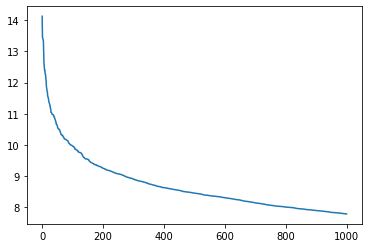

In [47]:
x = [x for x in range(1000)]
frequencies = [count for word, count in wordsCount.most_common(1000)]
plt.plot(x, numpy.log(frequencies))

概率计算

Prob（sentence） = Prob（w1,w2,w3,...,wn） = Prob(w1|w2,...,wn) * Prob(w2|w3,...wn) * Prob(w3|...wn) * ... * Prob(wn)

                ~ Prob(w1|w2) * Prob(w2|w3) * Prob(w3|w4) * ... * Prob(wn)
                
                = Cw1_2/Cw2 * Cw2_3/Cw3 * Cw3_4/ Cw4 * ... * Cwn/C_all

In [52]:
def independentProb(word):
    return wordsCount[word] / len(words)
print(independentProb("其实"))

7.617066966814964e-05


条件概率

In [82]:
aaa = [1,3,4,5,6,8,9]
len(aaa[0:-2])
# [''.join([str(aaa[i]),str(aaa[i+1])]) for i in range(len(aaa[0:-1]))]
aaa[-1]

9

In [62]:
word2s = ["".join(words[i:i+2]) for i in range(len(words[0:-1]))]
word2Counter = Counter(word2s)

[('\\n', 614616),
 ('。\\', 251805),
 ('\u3000\u3000', 199410),
 ('n\\', 131916),
 ('n\u3000', 129788),
 ('n新华社', 73788),
 ('2017年', 62300),
 ('日，', 61560),
 ('外代二线', 61385),
 ('。\r\n', 59824)]

In [65]:
word2Counter.most_common(10)

[('\\n', 614616),
 ('。\\', 251805),
 ('\u3000\u3000', 199410),
 ('n\\', 131916),
 ('n\u3000', 129788),
 ('n新华社', 73788),
 ('2017年', 62300),
 ('日，', 61560),
 ('外代二线', 61385),
 ('。\r\n', 59824)]

In [91]:
# 出现 word2 后出现 word1的概率
def conditionProb(word1, word2):
    return (word2Counter[''.join([word1,word2])] + 1) / (wordsCount[word2] + 1)

In [75]:
print(independentProb("的"))
print(independentProb("我"))
print(conditionProb("的","我"))
print(conditionProb("我","的"))

0.030529863739087174
0.0009418529330891418
0.0038686501174411644
0.0033289761586769344


使用

$$
Pro(sentence) = Pro(W_1W_2W_3W_4 ...W_n) = \prod_i^n \frac{\#(W_iW_{i+1})}{\#W_i} * Pro(W_n)
$$

Prob（sentence） = Prob（w1,w2,w3,...,wn） = Prob(w1|w2,...,wn) * Prob(w2|w3,...wn) * Prob(w3|...wn) * ... * Prob(wn)

                ~ Prob(w1|w2) * Prob(w2|w3) * Prob(w3|w4) * ... * Prob(wn)
                
                = Cw1_2/Cw2 * Cw2_3/Cw3 * Cw3_4/ Cw4 * ... * Cwn/C_all

In [89]:
def sentenceProb(sentence):
    sentenceWords = jieba.cut(sentence)
    p = 1;
    sentenceWords = [w for w in sentenceWords]
    for i in range(len(sentenceWords) - 1):
        p *= conditionProb(sentenceWords[i+1], sentenceWords[i])
    
    p *= independentProb(sentenceWords[-1])
    return p
        
sentenceProb("我们的中国拥有美丽的大地")

1.548017762280513e-23

In [93]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentenceProb(s1), sentenceProb(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.783831084332856e-41
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.3336168544382796e-37
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.3197712696149224e-23
---- 真是一只好看的小猫 with probility 1.0482305329345374e-19
今晚火锅去吃我 is more possible
---- 今晚我去吃火锅 with probility 4.239069121977485e-16
---- 今晚火锅去吃我 with probility 5.993612837805949e-14
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 8.365365467770974e-13
---- 养乐多绿来一杯 with probility 4.077473205470425e-06


## 上述答案和课程上的答案相差太大，不确定是哪出了问题，首先怀疑没有对特殊符号做处理导致结果不对，所以接下来，再次重写课堂上的方法

In [102]:
print(type(articles[100]))

print(float('nan'))
print(articles[100] != articles[100])
a = float('nan')
b = float('inf')
_inf = -float('inf')
print(100.1 != 100.1)
print(a != a)
print(b == b +100)
print(b == -b * 2)
print(_inf == b)
print(str(float('nan')))
print(str(float('inf')))

<class 'float'>
nan
True
False
True
True
False
False
nan
inf


In [98]:
# [word for word in jieba.cut(''.join(re.findall('\w+',articles[10])))]
# re.findall('\w+',articles[10])

In [99]:
wordsW = []
count = 0

for i, article in enumerate(articles):
    if article != article:
        continue
    try:
#         wordsW += jieba.cut(''.join(re.findall('\w+',str(article))))
        wordsW += jieba.cut(''.join(re.findall('\w+',(article))))
    except TypeError as e:
        print(i, article, e)
        count+=1
        break
    except AttributeError as e:
        print(i, article, e)
        count+=1
        break
        
        
print("错误数量：",count)


错误数量： 0


In [103]:
wordsCountW = Counter(wordsW)

In [104]:
wordsCountW.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

In [105]:
frequenciesW = [count for word, count in wordsCountW.most_common(10)]
len(wordsW)

17526086

In [54]:
def independentProbW(word):
    return wordsCountW[word] / len(wordsW)
print(wordsCountW["其实"])
print(independentProbW("其实"))

1756
0.00010017889006011475


In [55]:
word2sW = ["".join(wordsW[i:i+2]) for i in range(len(wordsW[0:-1]))]
word2CounterW = Counter(word2sW)

In [ ]:

# TOKEN = [str(t) for t in TOKEN]
# TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
# def prob_1(word): return words_count[word] / len(TOKEN)
# def prob_2(word1, word2):
#     if word1 + word2 in words_count_2:
#         return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
#     else:
#         return 1 / len(TOKEN_2_GRAM)

In [56]:
word2sW[:10]
len(word2sW)

17528642

In [131]:
# 出现 word2 后出现 word1的概率
def conditionProbW(word1, word2):
#     return (word2CounterW[''.join([word1,word2])] + 1) / (wordsCountW[word2] + 1)
    word_ = word1 + word2
    if word_ in word2CounterW:
#         return word2CounterW[word_] / len(word2CounterW)
        return word2CounterW[word_] / wordsCountW[word2]
    else :
#         return 1 / len(word2CounterW)
        return 1 / len(wordsCountW)


In [141]:
def sentenceProbW(sentence):
    sentenceWordsW = jieba.cut(sentence)
    p = 1.0;
    sentenceWordsW = [w for w in sentenceWordsW]
    for i in range(len(sentenceWordsW) - 1):
        print(sentenceWordsW[i] + sentenceWordsW[i+1])
        p *= conditionProbW(sentenceWordsW[i], sentenceWordsW[i+1])
    
    p *= independentProbW(sentenceWordsW[-1])
    return p
        
sentenceProbW("我们的中国拥有美丽的大地")
sentenceProbW("小明今天抽奖抽到一架波音飞机")


我们的
的中国
中国拥有
拥有美丽
美丽的
的大地
小明今天
今天抽奖
抽奖抽到
抽到一架
一架波音
波音飞机


8.723827741529556e-30

In [138]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "明天晚上请你吃大餐，我们一起吃苹果 明天晚上请你吃大餐，我们一起吃小米",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentenceProbW(s1), sentenceProbW(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.5987608083974104e-45
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.6892152223347666e-43
明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.6892152223347666e-43
---- 明天晚上请你吃大餐，我们一起吃小米 with probility 1.747897308407804e-46
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 3.0393657370775383e-27
---- 真是一只好看的小猫 with probility 8.316646860022639e-22
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.741646625652248e-18
---- 今晚火锅去吃我 with probility 1.4930931102957797e-20
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 7.620517528317306e-19
---- 养乐多绿来一杯 with probility 7.163286476618268e-17


In [139]:
print(wordsCountW["日料"])
print(wordsCountW["小米"])
print(wordsCountW["苹果"])
print(independentProbW("日料"))
print(independentProbW("苹果"))
print(conditionProbW("吃","日料"))
print(conditionProbW("吃","苹果"))

print(wordsCountW["今天"])
print(wordsCountW["明天"])
print(independentProbW("今天"))
print(independentProbW("明天"))
print(conditionProbW("今天","晚上"))
print(conditionProbW("明天","晚上"))

print(conditionProbW("吃","日料") * conditionProbW("今天","晚上") * independentProbW("日料"))
print(conditionProbW("吃","苹果") * conditionProbW("明天","晚上") * independentProbW("苹果"))

2
286
1103
1.1411561029656023e-07
6.293475907855296e-05
3.6545566840014473e-06
0.003626473254759746
2529
374
0.0001442991892200004
2.133961912545676e-05
0.004780114722753346
3.6545566840014473e-06
1.9935084433948304e-15
8.340839327163971e-13


## 结论： 上课的时候，我还感觉这个数据集已经很大了，训练后这个模型应该很强大! 可是实践过后发现，这概率结果跟语料偏向某一知识领域有很大关系，导致这个方法很不准确，至少一阶概率模型是这样。
## 但它还是有一些作用的，至少可以过滤掉好多不合理的句子。